# 1. 라이브러리 및 패키지 불러오기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re  

# 2. 데이터 불러오기

In [3]:
log_data = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/log_data.csv')
log_data.head(10)

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
5,640185,UseLoanManage,2022-03-25 11:41:53,iOS,3.6.1,2022-03-25
6,640185,ViewLoanApplyIntro,2022-03-25 11:42:38,iOS,3.6.1,2022-03-25
7,640185,UsePrepayCalc,2022-03-25 11:43:07,iOS,3.6.1,2022-03-25
8,640185,UseLoanManage,2022-03-25 11:43:57,iOS,3.6.1,2022-03-25
9,640185,UseLoanManage,2022-03-25 11:44:04,iOS,3.6.1,2022-03-25


In [3]:
log_data1 = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/log_data_1.csv')
log_data1.head(10)

,Unnamed: 0,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,0,576409,StartLoanApply,2022-03-25 11:12,Android,3.8.2,2022-03-25
1,1,576409,ViewLoanApplyIntro,2022-03-25 11:12,Android,3.8.2,2022-03-25
2,2,72878,EndLoanApply,2022-03-25 11:14,Android,3.8.4,2022-03-25
3,4,645317,UseLoanManage,2022-03-25 11:15,iOS,3.6.1,2022-03-25
4,5,640185,UseLoanManage,2022-03-25 11:41,iOS,3.6.1,2022-03-25
5,6,640185,ViewLoanApplyIntro,2022-03-25 11:42,iOS,3.6.1,2022-03-25
6,7,640185,UsePrepayCalc,2022-03-25 11:43,iOS,3.6.1,2022-03-25
7,8,640185,UseLoanManage,2022-03-25 11:43,iOS,3.6.1,2022-03-25
8,9,640185,UseLoanManage,2022-03-25 11:44,iOS,3.6.1,2022-03-25
9,10,640185,UseLoanManage,2022-03-25 11:44,iOS,3.6.1,2022-03-25


In [4]:
user_spec = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/user_spec.csv')
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


In [5]:
loan_result = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/loan_result.csv')
loan_result.head(60)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
5,1748340,2022-06-07 13:05:40,35,168,21000000.0,15.2,NaN
6,1748340,2022-06-07 13:05:40,44,8,3000000.0,14.8,NaN
7,1748340,2022-06-07 13:05:41,28,217,10000000.0,18.0,NaN
8,1748340,2022-06-07 13:05:46,47,181,31000000.0,13.0,NaN
9,1748340,2022-06-07 13:05:51,11,170,50000000.0,13.3,NaN


## 2-1. 데이터 확인하기

In [6]:
user_spec.duplicated(['application_id']).sum()

0

### 1) unique

In [7]:
user_spec['purpose'].unique()

array(['기타', '대환대출', '생활비', '사업자금', '주택구입', '전월세보증금', '투자', 'LIVING',
       'SWITCHLOAN', 'ETC', 'INVEST', '자동차구입', 'BUSINESS', 'BUYCAR', nan,
       'HOUSEDEPOSIT', 'BUYHOUSE'], dtype=object)

In [8]:
loan_result['application_id'].nunique()

968866

In [9]:
log_data['user_id'].nunique()

584636

In [10]:
user_spec['application_id'].nunique()

1394216

In [11]:
user_spec['user_id'].nunique()

405213

### 2) info

In [12]:
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [13]:
loan_result['is_applied'].value_counts()

0.0    9709675
1.0     560449
Name: is_applied, dtype: int64

In [14]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


In [15]:
log_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651500 entries, 0 to 651499
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      651500 non-null  int64 
 1   user_id         651500 non-null  int64 
 2   event           651500 non-null  object
 3   timestamp       651500 non-null  object
 4   mp_os           651483 non-null  object
 5   mp_app_version  640438 non-null  object
 6   date_cd         651500 non-null  object
dtypes: int64(2), object(5)
memory usage: 34.8+ MB


In [16]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

### 3) isnull().sum()

In [17]:
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [18]:
log_data.isnull().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

In [19]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

# 3. EDA

In [20]:
correct = loan_result[(loan_result['is_applied'] == 1) | (loan_result['is_applied'] == 0)]
correct

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
13285,576643,2022-05-09 10:54:53,54,235,11000000.0,16.5,0.0
13286,576643,2022-05-09 10:54:53,11,118,3000000.0,20.0,0.0
13287,2136706,2022-05-09 10:41:06,42,216,10000000.0,13.5,0.0
13288,2136706,2022-05-09 10:41:07,25,169,22000000.0,15.9,0.0
...,...,...,...,...,...,...,...
13519634,1969227,2022-05-16 14:42:58,2,7,30000000.0,13.6,0.0
13519635,1969227,2022-05-16 14:42:57,33,110,9000000.0,14.4,0.0
13519636,1969227,2022-05-16 14:42:56,50,142,3000000.0,11.2,0.0
13519637,1969227,2022-05-16 14:43:18,22,100,4000000.0,15.3,0.0


In [21]:
correct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10270124 entries, 13284 to 13519638
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 626.8+ MB


In [22]:
no_correct = loan_result[loan_result['is_applied'].isnull() ]
no_correct

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


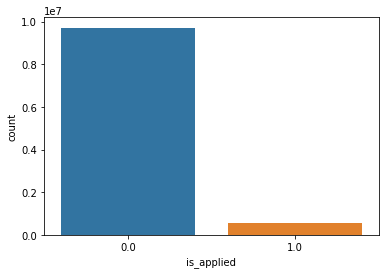

In [23]:
sns.countplot(x="is_applied", data=loan_result)
plt.show()

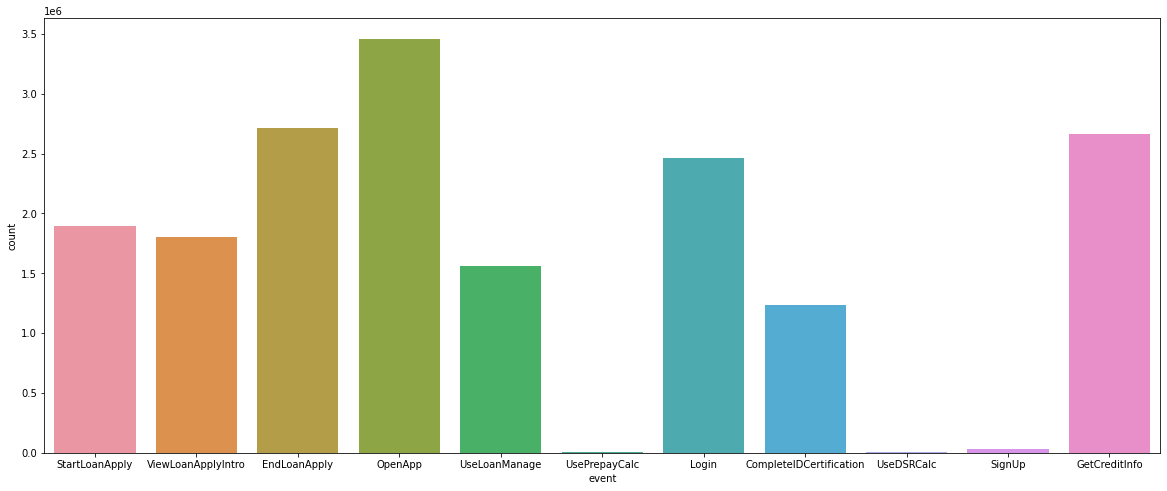

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x="event", data=log_data)
plt.show()

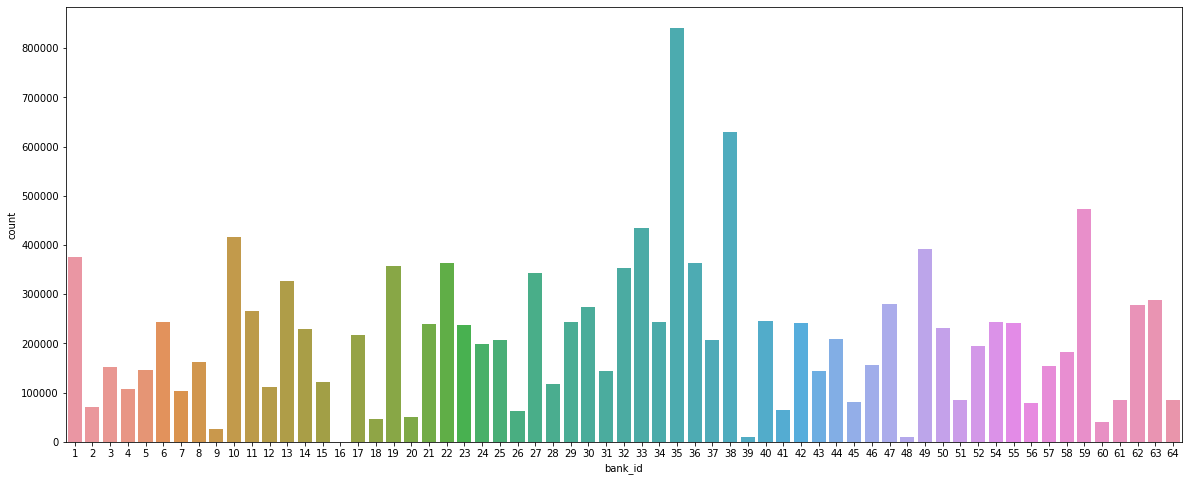

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(x="bank_id", data=loan_result)
plt.show()

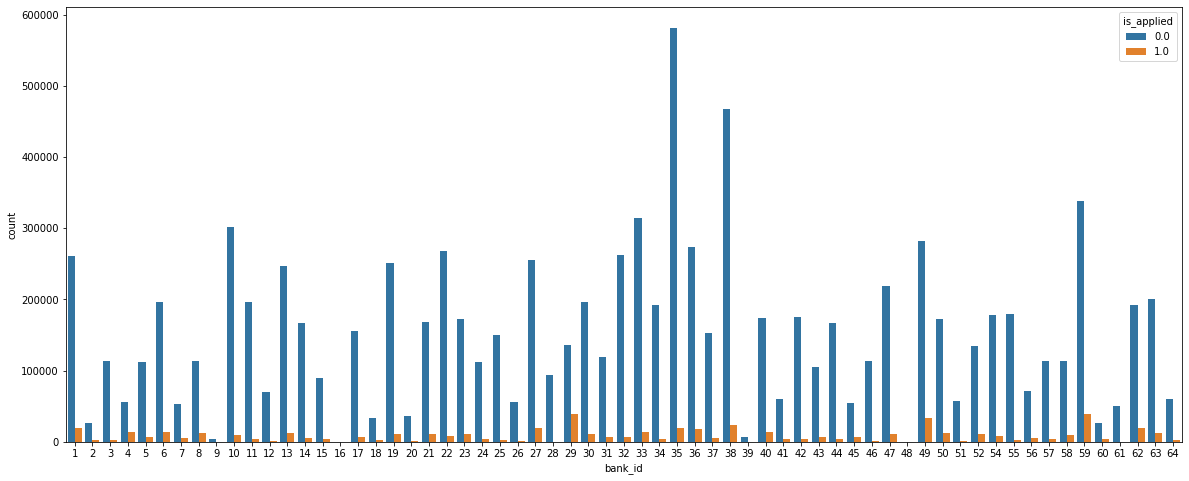

In [68]:
plt.figure(figsize=(20,8))
sns.countplot(x="bank_id", hue="is_applied", data=loan_result)
plt.show()

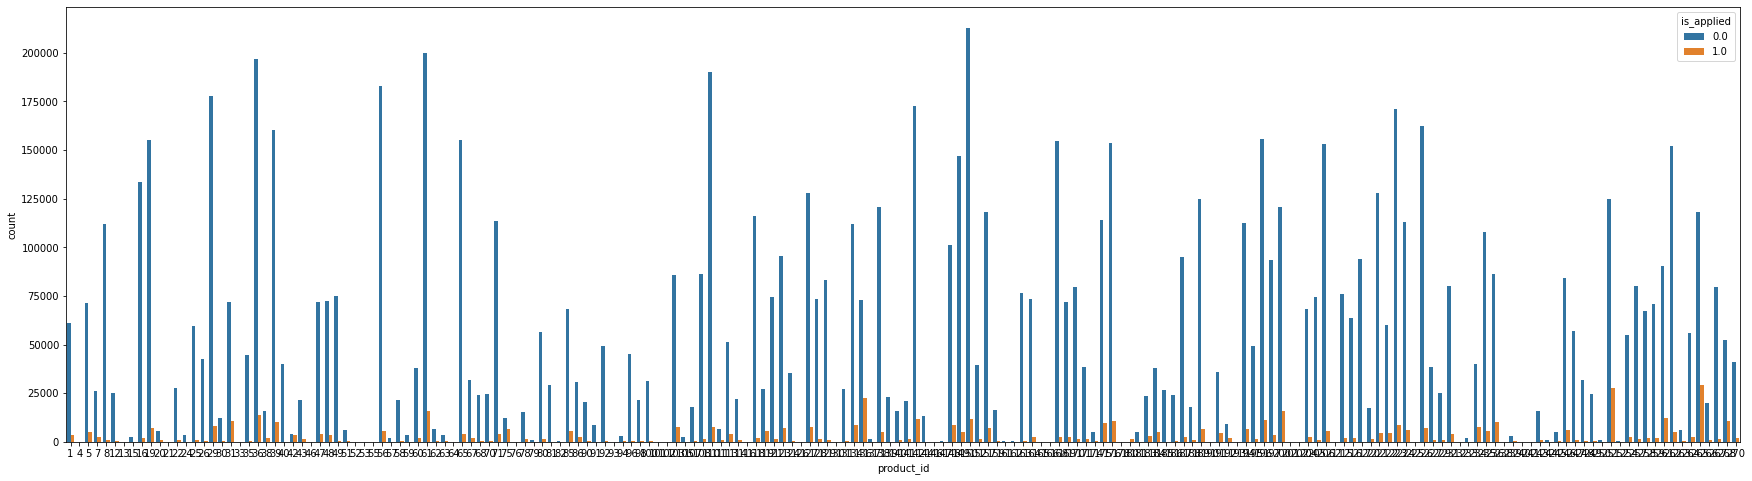

In [70]:
plt.figure(figsize=(30,8))
sns.countplot(x="product_id", hue="is_applied", data=loan_result)
plt.show()

In [26]:
#DateTime으로 인덱스 변경
sample1 = correct[correct['is_applied'] == 1]
sample1['loanapply_insert_time'] = pd.to_datetime(sample1['loanapply_insert_time'])
sample1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1.0
13304,2136706,2022-05-09 10:41:06,23,236,37000000.0,9.9,1.0
13309,2136706,2022-05-09 10:41:18,62,200,14000000.0,9.3,1.0
13314,2136706,2022-05-09 10:41:06,1,61,13000000.0,8.9,1.0
13383,679142,2022-05-09 13:39:36,47,47,12000000.0,6.7,1.0
...,...,...,...,...,...,...,...
13519533,763676,2022-05-16 13:39:39,60,183,60000000.0,5.2,1.0
13519555,327877,2022-05-16 14:08:39,2,7,30000000.0,11.8,1.0
13519617,190135,2022-05-16 07:52:13,59,150,9000000.0,17.7,1.0
13519620,1369315,2022-05-16 06:40:45,49,136,18000000.0,6.5,1.0


In [27]:
sample1 = sample1.set_index(keys=['loanapply_insert_time'],inplace=False, drop=False)

In [28]:
sample1 = sample1.astype({'is_applied':int})
sample1

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
loanapply_insert_time,,,,,,,
2022-05-09 08:44:59,2157865,2022-05-09 08:44:59,54,235,20000000.0,16.5,1
2022-05-09 10:41:06,2136706,2022-05-09 10:41:06,23,236,37000000.0,9.9,1
2022-05-09 10:41:18,2136706,2022-05-09 10:41:18,62,200,14000000.0,9.3,1
2022-05-09 10:41:06,2136706,2022-05-09 10:41:06,1,61,13000000.0,8.9,1
2022-05-09 13:39:36,679142,2022-05-09 13:39:36,47,47,12000000.0,6.7,1
...,...,...,...,...,...,...,...
2022-05-16 13:39:39,763676,2022-05-16 13:39:39,60,183,60000000.0,5.2,1
2022-05-16 14:08:39,327877,2022-05-16 14:08:39,2,7,30000000.0,11.8,1
2022-05-16 07:52:13,190135,2022-05-16 07:52:13,59,150,9000000.0,17.7,1


In [29]:
sample1 = sample1.resample('D').is_applied.count()

In [30]:
sample1 = pd.DataFrame(sample1)

In [31]:
sample1 = sample1.rename({'is_applied':'yes'},
                         axis = 1)

In [32]:
sample1 = sample1.rename({'loanapply_insert_time':'Daytime'},
                         axis = 1)

In [33]:
sample1

,yes
loanapply_insert_time,
2022-03-01,4491
2022-03-02,8063
2022-03-03,6584
2022-03-04,6004
2022-03-05,2501
...,...
2022-05-27,7442
2022-05-28,3143
2022-05-29,3042


In [34]:
sample1 = sample1.reset_index()

In [35]:
sample1

,loanapply_insert_time,yes
0,2022-03-01,4491
1,2022-03-02,8063
2,2022-03-03,6584
3,2022-03-04,6004
4,2022-03-05,2501
...,...,...
87,2022-05-27,7442
88,2022-05-28,3143
89,2022-05-29,3042
90,2022-05-30,7662


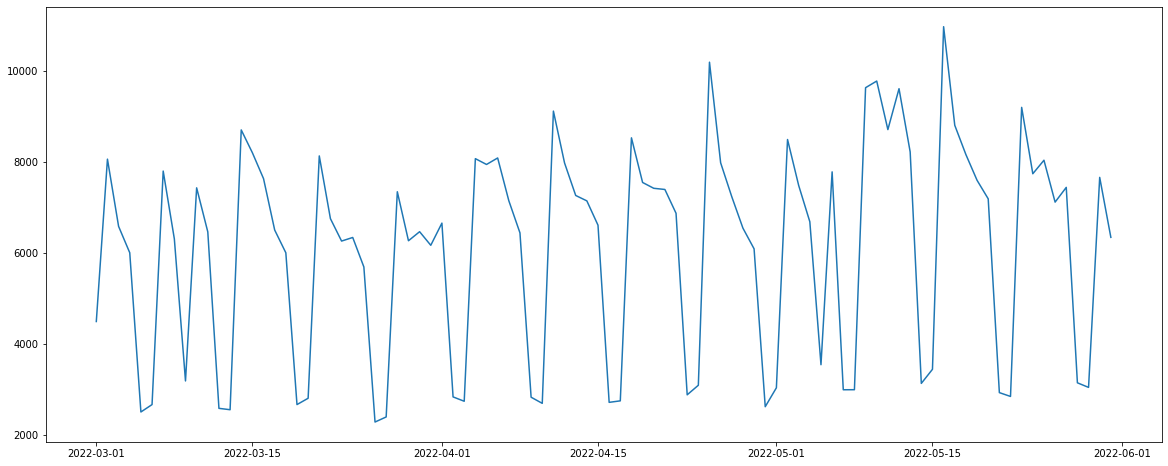

In [36]:
#시각화
sample1_x = sample1['loanapply_insert_time']
sample1_y = sample1['yes']

plt.figure(figsize=(20,8))
plt.plot(sample1_x, sample1_y)
plt.show()

In [44]:
sample1 = sample1.astype({'yes':float})

In [62]:
#구간별 이동평균
sample1['line'] = sample1['yes'].rolling(window=15).mean()

[ rolling 메서드 ]
현재 열에 대하여 일정 크기의 창(window)를 이용하여 그 window안의 값을 추가 메서드를 통해 계산하는 메서드

[ window ]
: 계산할 창(window)의 크기 입니다. 열 기준으로 계산할 경우 행의 수입니다.

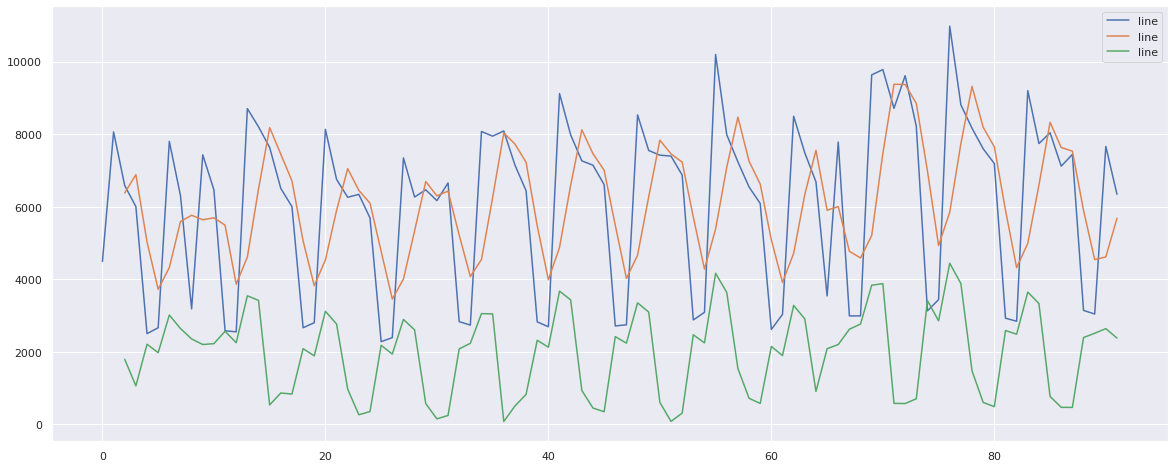

In [75]:
plt.figure(figsize=(20,8))
sample1['yes'].plot(label='line', legend=True)
sample1['yes'].rolling(3).mean().plot(legend=True, label='line')
sample1['yes'].rolling(3).std().plot(legend=True, label='line')

# 데이터 합치기

In [ ]:
#join1 = pd.merge(user_spec, loan_result,left_on = 'application_id', right_on = 'application_id', how = 'right')

In [ ]:
#join1 = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/join1.csv')
#join1.head()

In [ ]:
#join2 = pd.merge(join1, log_data,left_on = 'user_id', right_on = 'user_id', how = 'right')

# log 데이터 전처리

In [4]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [5]:
relog = log_data[['user_id','timestamp','event']]
relog

,user_id,timestamp,event
0,576409,2022-03-25 11:12:09,StartLoanApply
1,576409,2022-03-25 11:12:09,ViewLoanApplyIntro
2,72878,2022-03-25 11:14:44,EndLoanApply
3,645317,2022-03-25 11:15:09,OpenApp
4,645317,2022-03-25 11:15:11,UseLoanManage
...,...,...,...
17843988,242442,2022-05-27 16:08:21,StartLoanApply
17843989,242442,2022-05-27 16:08:21,EndLoanApply
17843990,593062,2022-05-27 16:19:10,OpenApp
17843991,593062,2022-05-27 16:19:15,Login


In [6]:
relog['event'].unique()

array(['StartLoanApply', 'ViewLoanApplyIntro', 'EndLoanApply', 'OpenApp',
       'UseLoanManage', 'UsePrepayCalc', 'Login',
       'CompleteIDCertification', 'UseDSRCalc', 'SignUp', 'GetCreditInfo'],
      dtype=object)

In [7]:
relog['event'] = relog['event'].replace("StartLoanApply", 1).replace("ViewLoanApplyIntro", 2).replace("EndLoanApply", 3).replace("OpenApp", 4).replace("UseLoanManage", 5).replace("UsePrepayCalc", 6).replace("Login", 7).replace("CompleteIDCertification", 8).replace("UseDSRCalc", 9).replace("SignUp", 10).replace("GetCreditInfo", 11)
relog

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,user_id,timestamp,event
0,576409,2022-03-25 11:12:09,1
1,576409,2022-03-25 11:12:09,2
2,72878,2022-03-25 11:14:44,3
3,645317,2022-03-25 11:15:09,4
4,645317,2022-03-25 11:15:11,5
...,...,...,...
17843988,242442,2022-05-27 16:08:21,1
17843989,242442,2022-05-27 16:08:21,3
17843990,593062,2022-05-27 16:19:10,4
17843991,593062,2022-05-27 16:19:15,7


In [8]:
relog = relog.sort_values(by=["user_id", "timestamp"], ascending=[True, True]) 
relog

,user_id,timestamp,event
11709372,1,2022-05-03 14:52:28,11
11709374,1,2022-05-03 14:52:35,11
2451691,1,2022-06-16 23:58:41,5
2451693,1,2022-06-16 23:58:41,7
7071607,1,2022-06-16 23:58:42,11
...,...,...,...
7298671,879696,2022-03-14 05:38:16,8
7298672,879696,2022-03-14 05:42:14,3
8248077,879698,2022-05-24 22:33:24,4
8248080,879698,2022-05-24 22:33:32,1


In [29]:
relog = relog.astype({'event':str})
relog

,user_id,timestamp,event
11709372,1,2022-05-03 14:52:28,11
11709374,1,2022-05-03 14:52:35,11
2451691,1,2022-06-16 23:58:41,5
2451693,1,2022-06-16 23:58:41,7
7071607,1,2022-06-16 23:58:42,11
...,...,...,...
7298671,879696,2022-03-14 05:38:16,8
7298672,879696,2022-03-14 05:42:14,3
8248077,879698,2022-05-24 22:33:24,4
8248080,879698,2022-05-24 22:33:32,1


In [30]:
num = 0

for i in range(len(relog)):
  if i > 0 :
    if (relog['user_id'].values[i]) == (relog['user_id'].values[num]):
      relog['event'].values[num] = str(relog['event'].values[num]) + '-' + str(relog['event'].values[i])
    else:
      num = i

In [31]:
relog = relog.drop_duplicates(['user_id'], keep = 'first')

In [32]:
relog

,user_id,timestamp,event
11709372,1,2022-05-03 14:52:28,11-11-5-7-11
10428909,7,2022-05-22 16:39:49,11
9627339,9,2022-05-21 23:37:58,11-11-11
9505105,11,2022-03-24 10:53:59,4-11-5-11-6-1-2-8-3-5-5-11-4-11-5-2-8-3-11-5-5...
1447554,12,2022-03-14 01:13:11,4-7-1-2-8-3-3-3-4-7-1-2-8-3-3-3-4-7-1-2-8-3-3-...
...,...,...,...
2012632,879693,2022-05-13 11:29:49,1-2-8-3-4-1-3-4-5-11-1-3-4-1-2-8-1-2-8-1-3-3-3...
14380169,879694,2022-03-31 20:07:23,1-2-8-3-3-3
6068504,879695,2022-05-27 12:48:32,1-2-8-3
7298665,879696,2022-03-14 05:35:34,7-5-11-11-5-11-4-7-2-8-3


In [35]:
relog.to_csv('/content/drive/MyDrive/2022_Bigcontest/Data/relog.csv')

In [36]:
relog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584636 entries, 11709372 to 8248077
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    584636 non-null  int64 
 1   timestamp  584636 non-null  object
 2   event      584636 non-null  object
dtypes: int64(1), object(2)
memory usage: 17.8+ MB


In [37]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB
